In [1]:
!pip install easyocr
!pip install ultralytics
!pip install torchmetrics


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import yaml
from ultralytics import YOLO
from PIL import Image
import os
import cv2
import json
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher
from torchmetrics.text import CharErrorRate, WordErrorRate

In [2]:
#from google.colab import drive
#drive.mount('',force_remount=True)

In [3]:
yaml_filename = 'odometer_dataset.yaml'

data = {
    'train': 'C:\\Users\\cw\\Downloads\\car_dataset\\images\\train',
    'val': 'C:\\Users\\cw\\Downloads\\car_dataset\\images\\val',
    'nc': 1,
    'names': ['odometer']  # Ensure this is a list, not a string
}
with open(yaml_filename, 'w') as file:
    yaml.dump(data, file, default_flow_style=None)

In [4]:
# 3. Create Yolo model
model = YOLO('yolov8n.yaml')  # creates Yolo object from 'yolov8n.yaml' configuration file.
model = YOLO('yolov8n.pt')  # Loads pretrained weights
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

Transferred 355/355 items from pretrained weights


In [6]:
model.train(data='{}'.format(yaml_filename), epochs=2, patience=10, batch=16, imgsz=640, pretrained=True)

New https://pypi.org/project/ultralytics/8.2.102 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.95  Python-3.11.0 torch-2.4.1+cpu CPU (AMD Ryzen 3 3250U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=odometer_dataset.yaml, epochs=2, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train142, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning C:\Users\cw\Downloads\car_dataset\labels\train.cache... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s
val: Scanning C:\Users\cw\Downloads\car_dataset\labels\val.cache... 24 images, 1 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]

Plotting labels to runs\detect\train142\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train142
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      1.864      4.308      1.314         20        640: 100%|██████████| 6/6 [02:24<00:00, 24.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.96s/it]

                   all         25         24     0.0016        0.5    0.00224    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G       1.86      3.681      1.367         16        640: 100%|██████████| 6/6 [01:54<00:00, 19.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.18s/it]

                   all         25         24      0.002      0.625    0.00319    0.00138



2 epochs completed in 0.080 hours.
Optimizer stripped from runs\detect\train142\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train142\weights\best.pt, 6.2MB

Validating runs\detect\train142\weights\best.pt...
Ultralytics YOLOv8.2.95  Python-3.11.0 torch-2.4.1+cpu CPU (AMD Ryzen 3 3250U with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.78s/it]


                   all         25         24      0.002      0.625    0.00319    0.00138
Speed: 6.9ms preprocess, 349.1ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs\detect\train142


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023A0B047810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [7]:
model = YOLO('runs/detect/train2/weights/best.pt')

In [8]:
im = Image.open(
    'C:\\Users\\cw\\Downloads\\car_dataset\\images\\val\\f9d6579e-560e-4b49-9518-a66455d38906.jpeg')
results = model.predict(source=im, save=True)


0: 448x640 1 odometer, 312.5ms
Speed: 15.6ms preprocess, 312.5ms inference, 15.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict9


In [9]:
im_dir = 'C:\\Users\\cw\\Downloads\\car_dataset\\images\\val'
results = model.predict(source=im_dir, save=True)


image 1/25 C:\Users\cw\Downloads\car_dataset\images\val\0c70e8b8-2c21-4faa-a1dd-1e0ee6f02e58.jpeg: 480x640 1 odometer, 328.1ms
image 2/25 C:\Users\cw\Downloads\car_dataset\images\val\0caa5ccf-61be-4111-a75d-9285c9956b58.jpeg: 448x640 1 odometer, 250.1ms
image 3/25 C:\Users\cw\Downloads\car_dataset\images\val\1aeb3991-9a35-4823-b2e3-339b1e6dd53b.jpeg: 448x640 1 odometer, 257.8ms
image 4/25 C:\Users\cw\Downloads\car_dataset\images\val\1c6142f6-5eb2-43d8-a347-78d4c6156a27.jpeg: 448x640 1 odometer, 265.6ms
image 5/25 C:\Users\cw\Downloads\car_dataset\images\val\2ce7942a-399f-44e9-a42d-8a2e220b10ec.jpeg: 448x640 1 odometer, 250.1ms
image 6/25 C:\Users\cw\Downloads\car_dataset\images\val\3aece9a1-1dce-4de2-9f1a-80d3c81c43bd.jpeg: 448x640 1 odometer, 281.3ms
image 7/25 C:\Users\cw\Downloads\car_dataset\images\val\3be914c3-8fe1-4486-82a5-c8a6c16b19cb.jpeg: 448x640 1 odometer, 281.2ms
image 8/25 C:\Users\cw\Downloads\car_dataset\images\val\3c3fde66-9bb3-4abc-8841-5bd604800e0d.jpeg: 448x640 1 o

In [10]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [11]:
image_path = "C:\\Users\\cw\\Downloads\\car_dataset\\images\\val\\f9d6579e-560e-4b49-9518-a66455d38906.jpeg"
image = cv2.imread(image_path)
img = image.copy()

In [12]:
v8_results = model.predict(image_path)
prediction = v8_results[0]
boxes = prediction.boxes
try:
    xyxy = boxes.xyxy[0]
except IndexError:
    print("No bounding boxes found.")


image 1/1 C:\Users\cw\Downloads\car_dataset\images\val\f9d6579e-560e-4b49-9518-a66455d38906.jpeg: 448x640 1 odometer, 265.6ms
Speed: 0.0ms preprocess, 265.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


In [13]:
cropped = image[int(xyxy[1]): int(xyxy[3]), int(xyxy[0]): int(xyxy[2])]
cropped 

array([[[156, 158, 158],
        [135, 133, 133],
        [144, 138, 139],
        ...,
        [105,  81,  81],
        [101,  80,  79],
        [ 99,  78,  77]],

       [[157, 157, 157],
        [134, 129, 130],
        [143, 137, 138],
        ...,
        [109,  83,  83],
        [106,  82,  82],
        [103,  79,  79]],

       [[156, 156, 156],
        [135, 130, 131],
        [145, 139, 140],
        ...,
        [112,  82,  81],
        [109,  81,  80],
        [107,  79,  78]],

       ...,

       [[173, 175, 175],
        [175, 177, 178],
        [178, 180, 181],
        ...,
        [123, 117, 118],
        [116, 111, 112],
        [115, 112, 114]],

       [[170, 172, 172],
        [175, 177, 178],
        [179, 181, 182],
        ...,
        [137, 132, 133],
        [126, 124, 124],
        [123, 120, 122]],

       [[169, 171, 171],
        [171, 173, 174],
        [173, 175, 176],
        ...,
        [131, 128, 130],
        [129, 126, 128],
        [129, 126, 128]]

In [14]:
cv2.rectangle(img, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (255, 0, 0), 3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

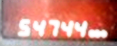

In [15]:
from PIL import Image, ImageFilter, ImageEnhance

imcropped = Image.fromarray(np.uint8(cropped))

scale_factor = 1.5  # Adjust scale factor according to your needs
new_dimensions = (int(imcropped.width * scale_factor), int(imcropped.height * scale_factor))
resized_image =imcropped.resize(new_dimensions, Image.Resampling.LANCZOS)

# Enhance image sharpness
enhancer = ImageEnhance.Sharpness(resized_image)
sharpened_image = enhancer.enhance(2.0)

# Enhance image contrast
enhancer = ImageEnhance.Contrast(sharpened_image)
contrast_enhanced_image = enhancer.enhance(2.0)

# Enhance image color
enhancer = ImageEnhance.Color(contrast_enhanced_image)
color_enhanced_image = enhancer.enhance(1.5)

# Apply a mild smoothing filter
smoothed_image = color_enhanced_image.filter(ImageFilter.SMOOTH_MORE)
smoothed_image

In [16]:
ocr_results = reader.readtext( np.array(smoothed_image), allowlist='0123456789km.')
value = []

for result in ocr_results:
    if result is None:
        continue
    value.append(result[1])

In [17]:
integer_list = [int(item) for item in value]
# Find the maximum value in the list of integers
max_value = max(integer_list)
print(max_value)

54744
